# Analyze car paremeters

I use data from [otomoto.pl](https://www.otomoto.pl/osobowe) acces on filename (DD_MM_YYYY_hh_mm)

Main goal of analyze is found driver profiles for model.

In [1]:
import os
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CV = "CV"
EV = "EV"
PHEV = "PHEV"
car_types = [CV, PHEV, EV]


### set plot params

In [2]:
plt.style.use('dark_background')
plt.rc('grid', alpha=0.3)
kde_params = {
    "fill": True,
    "linewidth": 1,
    "common_norm": False,
}

hist_params = {
    "fill": True,
    "linewidth": 0,
    "common_norm": False,
    "common_bins": False,
    "kde": True,
    "stat": "density",
}


### Set data

In [5]:
data_file = os.sep.join(["..", "data", "cars02_05_2023_01_21.csv"])
df = pd.read_csv(data_file)

aliases = {
    "petrol": CV,
    "diesel": CV,
    "petrol-lpg": CV,
    "petrol-cng": CV,
    "electric": EV,
    "hybrid": PHEV,
}

df["type"] = df["fuel_type"].apply(lambda x: aliases[x])

today_year = datetime.date.today().year
today_year = 2023
df["age"] = df["year"].apply(lambda x: today_year - x)

df["mean_year_miliage"] = df.apply(
    lambda row: row["mileage"] // row.age if row.age != 0 else None,
    axis=1)



## Mean miliage

In [6]:
suggest_profiles = {
    CV: 14000,
    PHEV: 8000,
    EV: 3000,
}

<Axes: xlabel='type', ylabel='mean_year_miliage'>

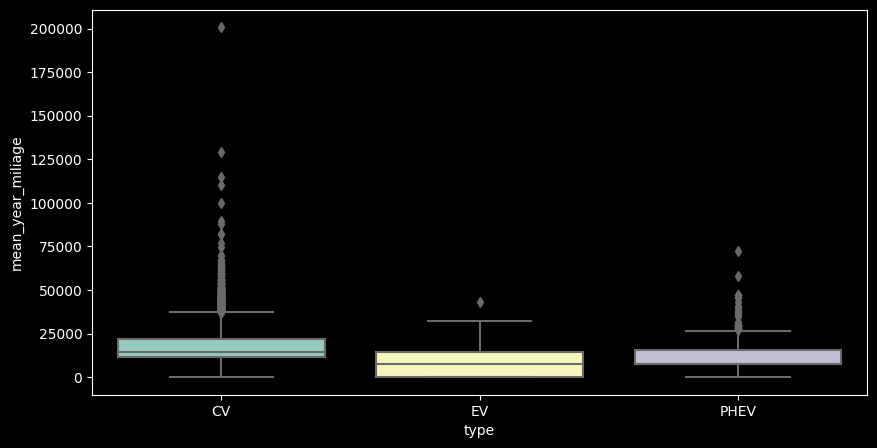

In [7]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(
    df,
    y="mean_year_miliage",
    x = "type"
    )


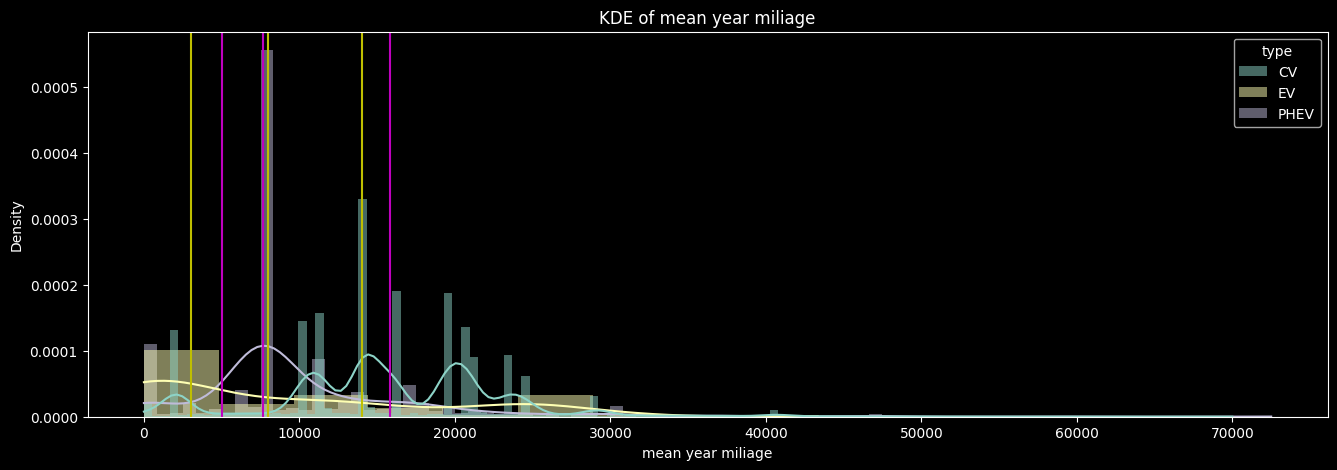

In [8]:
fig, ax = plt.subplots(figsize = (16,5))
max_age_median = 5

median_mean_miliage = {
    CV: df[(df["type"] == CV) & (df["age"] <= max_age_median)]["mean_year_miliage"].median(),
    EV: df[(df["type"] == EV) & (df["age"] <= max_age_median)]["mean_year_miliage"].median(),
    PHEV: df[(df["type"] == PHEV) & (df["age"] <= max_age_median)]["mean_year_miliage"].median(),
}

hist_plot = sns.histplot(
    df[(df["mean_year_miliage"] < 75_000) & (df["age"] <= max_age_median)],
    x = "mean_year_miliage",
    hue="type",
    **hist_params,
    )

# for key in median_mean_miliage:
#     plt.axvline(x=median_mean_miliage[key])

for key in suggest_profiles:
    plt.axvline(x=median_mean_miliage[key], color = "m")
    plt.axvline(x=suggest_profiles[key], color = "y")


plt.title("KDE of mean year miliage");
plt.xlabel("mean year miliage");

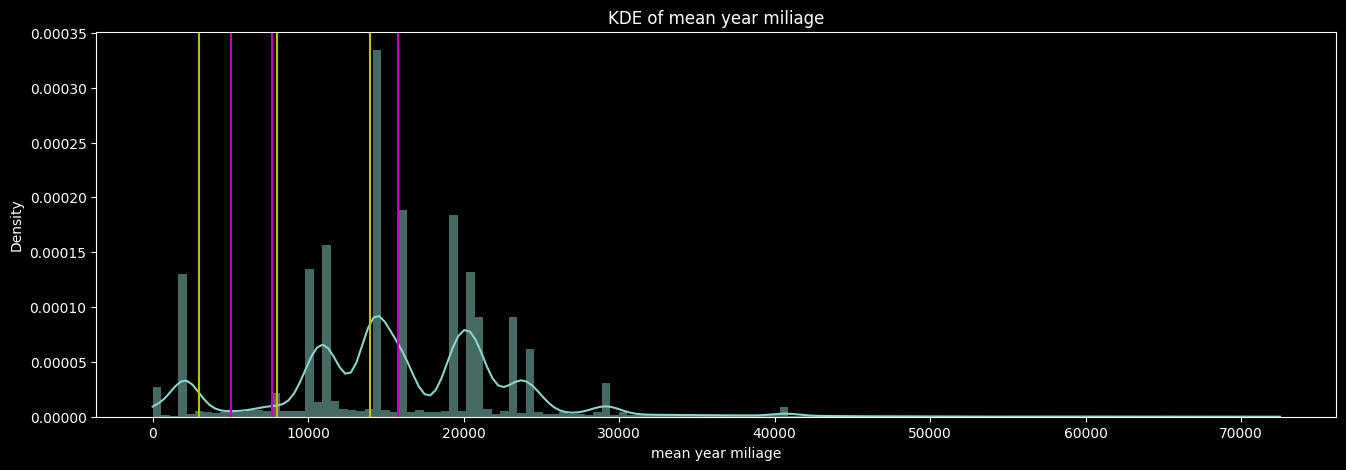

In [9]:
fig, ax = plt.subplots(figsize = (16,5))
max_age_median = 5


sns.histplot(
    df[(df["mean_year_miliage"] < 75_000) & (df["age"] <= max_age_median)],
    x = "mean_year_miliage",
    **hist_params,
    )

for key in suggest_profiles:
    plt.axvline(x=median_mean_miliage[key], color = "m")
    plt.axvline(x=suggest_profiles[key], color = "y")



plt.title("KDE of mean year miliage");
plt.xlabel("mean year miliage");

In [10]:
median_mean_miliage

{'CV': 15800.0, 'EV': 5030.0, 'PHEV': 7666.0}